<a href="https://colab.research.google.com/github/eunho792/BIGDATA/blob/master/Chipotle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

file_path = 'chipotle.tsv'
chipo = pd.read_csv(file_path, sep = '\t')

In [ ]:
print(chipo.shape)
print("-------------------------")
print(chipo.info())

chipo.head(10)



(4622, 5)
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [ ]:
#수치형 피처
# 1)연속형 피처: 어떤 구간안의 모든 값을 데이터로 가지수 있다.
# 2)비연속형 피처:셀수 있으며, 일정 구간안에서 정해진 몇
#범주형 피처
# 1)순서가 있는 범주형 피처:순서가 있으나 수치는 아니다
# 2)순서가 없는 범주형 피처:데이터가 구분되면서도 순서는 없다
chipo['order_id']= chipo['order_id'].astype(str)
# order_id는 숫자의 의미를 가지지않기 떄문에 str로 변환
print(chipo.describe())
#chipo 데이터 프레임에서 수치형 피처들의 기초 통계량을 확인한다.
#mean 아이템의 평ㄱ균 주문 수량 약 1.07-> 대부분이 한 아이템에 대해 1개정도만 주문했다.

          quantity
count  4622.000000
mean      1.075725
std       0.410186
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max      15.000000


In [ ]:
# unique() 함수로 범주형 피처의 개수 출력
# 두가지 피처는 범주형 이기때문에 unique()함수를 사용
print(len(chipo['order_id'].unique())) #order_id 개수를 출력
print(len(chipo['item_name'].unique())) #item_name 개수를 출력|

1834
50


In [ ]:
#<step2 인사이트의 발견>

#가장 많이 주문한 제품은 무엇일까?
item_count= chipo['item_name'].value_counts()[:10]
for idx,(val,cnt) in enumerate(item_count.iteritems(),1):
  print("Top",idx,":",val,cnt)

#제품당 주문한 양은 얼마인가?
chipo['item_name'].value_counts().index.tolist()[0]

Top 1 : Chicken Bowl 726
Top 2 : Chicken Burrito 553
Top 3 : Chips and Guacamole 479
Top 4 : Steak Burrito 368
Top 5 : Canned Soft Drink 301
Top 6 : Steak Bowl 211
Top 7 : Chips 211
Top 8 : Bottled Water 162
Top 9 : Chicken Soft Tacos 115
Top 10 : Chicken Salad Bowl 110


'Chicken Bowl'

In [ ]:
#아이테별 주문 개수와 총량
#아이템당 주문 개수 grouby()함수를 이용(데이터프레임에서 특정 피처를 기준으로 그룹을 생성하고 그룹별)
item_quantity = chipo.groupby('item_name')['quantity'].sum()
item_quantity[:10]

item_name
6 Pack Soft Drink         55
Barbacoa Bowl             66
Barbacoa Burrito          91
Barbacoa Crispy Tacos     12
Barbacoa Salad Bowl       10
Barbacoa Soft Tacos       25
Bottled Water            211
Bowl                       4
Burrito                    6
Canned Soda              126
Name: quantity, dtype: int64

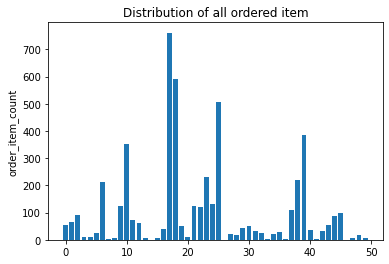

In [ ]:
#간단한 시각화
#시각화를 하면 숫자와 문자로만 되어있는 데이터에서는 보이지 않던 정보를 발견한수도 있다.
%matplotlib inline 
# 브라우저에서 결과 그리믈 바로 볼 수 있게 설정
import numpy as np
import matplotlib.pyplot as plt

item_name_list = item_quantity.index.tolist()
x_pos = np.arange(len(item_name_list))
order_cnt = item_quantity.values.tolist()

plt.bar(x_pos,order_cnt,align='center')
plt.ylabel('order_item_count')
plt.title('Distribution of all ordered item')
plt.show()

In [ ]:
#<step 3 데이터 전처리

In [ ]:
# apply lamda 함수를 이용하 데이터 전처리
#item_price 가 문자열이기 때문에 ($) 요약 통계를 구할수 없다.

print(chipo.info())

chipo['item_price'].head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   object
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(1), object(4)
memory usage: 180.7+ KB
None


0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [ ]:
chipo['item_price']=chipo['item_price'].apply(iambda x: float(x[1:]))
chipo.describe()


SyntaxError: ignored

In [ ]:
chipo['item_price'].head()

0     $2.39 
1     $3.39 
2     $3.39 
3     $2.39 
4    $16.98 
Name: item_price, dtype: object

In [ ]:
chipo.groupby('order_id')['item_price'].sum().mean()
chipo.groupby('order_id')['item_price'].sum().describe()[:10]

TypeError: ignored

count             1834
unique             642
top       $8.75 $4.45 
freq                61
Name: item_price, dtype: object

In [ ]:
chipo_orderid_group = chipo.groupby('order_id').sum()
results = chipo_orderid_group[chipo_orderid_group.item_price >= 10]

print(results[:10])
print(results.index.values)

AttributeError: ignored

In [ ]:
item_name_list = price_per_item.index.tolist()
x_pos = np.arange(len(item_name_list))
item_price = price_per_item['item_price'].tolist()

plt.bar(x_pos.item_price, align='center')
plt.show()



NameError: ignored

In [ ]:
chipo_salad=chipo[chipo['item_name']=="Veggie Salad Bowl"]
print(len(chipo_salad))
chipo_salad.head(5)

      order_id  ...  item_price
186         83  ...     $11.25 
295        128  ...     $11.25 
455        195  ...     $11.25 
496        207  ...     $11.25 
960        394  ...      $8.75 
1316       536  ...      $8.75 
1884       760  ...     $11.25 
2156       869  ...     $11.25 
2223       896  ...      $8.75 
2269       913  ...      $8.75 
2683      1066  ...      $8.75 
3223      1289  ...     $11.25 
3293      1321  ...      $8.75 
4109      1646  ...     $11.25 
4201      1677  ...     $11.25 
4261      1700  ...     $11.25 
4541      1805  ...      $8.75 
4573      1818  ...      $8.75 

[18 rows x 5 columns]
18


,order_id,quantity,item_name,choice_description,item_price
186,83,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
295,128,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$11.25
455,195,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$11.25
496,207,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Rice, Lettuce, Guacamole...",$11.25
960,394,1,Veggie Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


In [ ]:
chipo_chicken=chipo[chipo['item_name']=="Chicken Salad Bowl"]
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()['quantity']
chipo_chicken_result = chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]


print(chipo_chicken_result)

order_id
60      2
94      2
137     2
221     2
243     2
261     2
337     2
357     2
459     2
734     2
777     2
850     2
960     2
1189    2
1265    2
1305    2
1357    2
1368    2
1409    2
1483    2
1521    2
1679    2
1813    2
1834    3
Name: quantity, dtype: int64
